In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
data = pd.read_csv("housing.csv")

def train_test_split_(x, y, test_size, random_seed = 0):
    np.random.seed(random_seed)
    num_train = int(len(x)*(1 - test_size))
    dataset = pd.concat([x, y], axis = 1)
    indices = np.array(dataset.index)
    np.random.shuffle(indices)

    train_dataset = pd.DataFrame([dataset.loc[i, :] for i in indices[:num_train]])
    test_dataset = pd.DataFrame([dataset.loc[i, :] for i in indices[num_train:]])
    x_train = train_dataset.iloc[:, :-1]
    y_train = pd.DataFrame(train_dataset.iloc[:, -1].to_numpy().reshape(x_train.shape[0],1))
    x_test = test_dataset.iloc[:, :-1]
    y_test = pd.DataFrame(test_dataset.iloc[:, -1].to_numpy().reshape(x_test.shape[0],1))
    return x_train, y_train, x_test, y_test  

In [355]:
# sns.heatmap(data.corr(), annot = True)
dataset = data.copy()
Y = dataset['Y']
x = dataset.drop('Y', axis = 1)
x_train, y_train, x_test, y_test = train_test_split_(x, Y, 0.2, 123)
# x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, shuffle=True, random_state=42)
# display(x_test)

In [356]:
class MultipleRegressionReg(object):
    def __init__(self):
        self.a = np.zeros(1)
        self.intercept = True
    def predict(self, x):
        return x @ self.a
    def MSE(self, x, Y):
        return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
    def MAE(self, x, Y):
        return abs((Y.to_numpy() - self.predict(x).to_numpy())).mean()
    def MAPE(self, x, Y):
        return abs((Y.to_numpy() - self.predict(x).to_numpy())/Y).mean().to_real()
    def coefs(self):
        return self.a
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000, intercept = True, reg = "No", lam = 0, rho = 0):
        self.intercept = intercept
        self.x = x.copy()
        self.Y = Y.copy()
        if intercept:
            self.x.insert(0, "intercept", np.ones((self.x.shape[0],1)), allow_duplicates=True)                
        m = len(self.x)
        self.a = np.zeros(self.x.shape[1]).reshape(self.x.shape[1], 1)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a = -2*self.x.T@(self.Y.to_numpy() -self.predict(self.x).to_numpy())/m
            if reg == "L1":
                dT_a += lam*(np.sign(self.a))
            elif reg == "L2":
                dT_a += 2*lam*((self.a))
            elif reg == "ElasticNet":
                dT_a += rho*lam*(np.sign(self.a)) + 2*(1-rho)*lam*((self.a))
            
            self.a -= alpha*dT_a
            new_error = self.MSE(self.x, self.Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [357]:
""" train_scores, test_scores = [], []
reg_regr = MultipleRegressionReg()
for l in np.logspace(-5, 10, 15):
    steps, errors = reg_regr.fit(x_train, y_train, intercept = True, alpha = 0.01, epsylon = 0.00001, max_steps = 5000, reg = "ElasticNet", lam = l, rho = 0.1)
    x_i = x_train.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True) 
    train_scores.append(reg_regr.MSE(x_i, y_train))
    x_i = x_test.copy()
    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True) 
    test_scores.append(reg_regr.MSE(x_i, y_test))
plt.plot(train_scores, 'g')
plt.plot(test_scores, 'r') """

' train_scores, test_scores = [], []\nreg_regr = MultipleRegressionReg()\nfor l in np.logspace(-5, 10, 15):\n    steps, errors = reg_regr.fit(x_train, y_train, intercept = True, alpha = 0.01, epsylon = 0.00001, max_steps = 5000, reg = "ElasticNet", lam = l, rho = 0.1)\n    x_i = x_train.copy()\n    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True) \n    train_scores.append(reg_regr.MSE(x_i, y_train))\n    x_i = x_test.copy()\n    x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True) \n    test_scores.append(reg_regr.MSE(x_i, y_test))\nplt.plot(train_scores, \'g\')\nplt.plot(test_scores, \'r\') '

C:\Users\naclz\AppData\Local\Temp\ipykernel_18496\2977700618.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\naclz\AppData\Local\Temp\ipykernel_18496\2977700618.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\naclz\AppData\Local\Temp\ipykernel_18496\2977700618.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\naclz\AppData\Local\Temp\ipykernel_18496\2977700618.py:8: RuntimeWarning: overflow encountered in matmul
  return (((Y.to_numpy() - self.predict(x).to_numpy()).T@(Y.to_numpy() - self.predict(x).to_numpy()))/x.shape[0])[0][0]
C:\Users\naclz\AppData\Local\Temp\ipykernel_18496\2977700618.py:

For L1 regularization, optimal lambda: 0.5455594781168515, Min difference: 5.93
MSE train: 30.47, MSE test: 36.40
For L2 regularization, optimal lambda: 1e-05, Min difference: 9.99
MSE train: 21.20, MSE test: 31.19
For ElasticNet regularization, optimal lambda: 1e-05, Min difference: 9.99
MSE train: 21.20, MSE test: 31.19


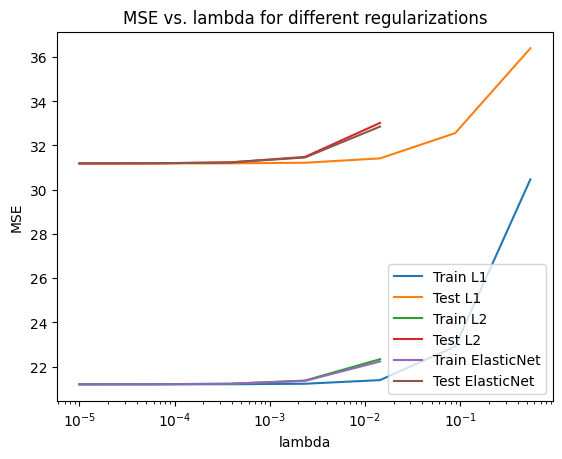

In [365]:
reg_regr = MultipleRegressionReg()
regs = ["L1", "L2", "ElasticNet"]
lambdas = np.logspace(-5, 10, 20)

lambda_differences = {}
best_results = {reg: {'lambda': None, 'min_difference': float('inf'), 'MSE_train': None, 'MSE_test': None} for reg in regs}
train_scores_all = {reg: [] for reg in regs}
test_scores_all = {reg: [] for reg in regs}

for reg in regs:
    for l in lambdas:
        steps, errors = reg_regr.fit(x_train, y_train, intercept=True, alpha=0.01, epsylon=0.00001, max_steps=1000, reg=reg, lam=l, rho=0.1)
        x_i = x_train.copy()
        x_i.insert(0, "intercept", np.ones((x_i.shape[0], 1)), allow_duplicates=True)
        x_i_test = x_test.copy()
        x_i_test.insert(0, "intercept", np.ones((x_i_test.shape[0], 1)), allow_duplicates=True)
        mse_train = reg_regr.MSE(x_i, y_train)
        mse_test = reg_regr.MSE(x_i_test, y_test)
        difference = abs(mse_train - mse_test)

        if mse_train < 40 and mse_test < 40:
            train_scores_all[reg].append(mse_train)
            test_scores_all[reg].append(mse_test)

        if difference < best_results[reg]['min_difference'] and mse_train < 40 and mse_test < 40:
            best_results[reg]['min_difference'] = difference
            best_results[reg]['lambda'] = l
            best_results[reg]['MSE_train'] = mse_train
            best_results[reg]['MSE_test'] = mse_test


for reg, train_scores in train_scores_all.items():
    test_scores = test_scores_all[reg]
    if train_scores and test_scores and len(train_scores) == len(test_scores):
        plt.semilogx(lambdas[:len(train_scores)], train_scores, label=f"Train {reg}")
        plt.semilogx(lambdas[:len(test_scores)], test_scores, label=f"Test {reg}")

for reg, results in best_results.items():
    print(f"For {reg} regularization, optimal lambda: {results['lambda']}, Min difference: {results['min_difference']:.2f}")
    print(f"MSE train: {results['MSE_train']:.2f}, MSE test: {results['MSE_test']:.2f}")

plt.legend()
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE vs. lambda for different regularizations')
plt.show()


In [359]:
""" reg_regr = MultipleRegressionReg()
regs = ["L1", "L2", "ElasticNet"]
lambdas = np.logspace(-5, 10, 15)
lambda_differences = {}  

for reg in regs:
    train_scores, test_scores = [], []

    for l in lambdas:
        steps, errors = reg_regr.fit(x_train, y_train, intercept=True, alpha=0.01, epsylon=0.00001, max_steps=500, reg=reg, lam=l, rho=0.1)
        x_i = x_train.copy()
        x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True) 
        train_scores.append(reg_regr.MSE(x_i, y_train))
        x_i = x_test.copy()
        x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True) 
        test_scores.append(reg_regr.MSE(x_i, y_test))
        
        # Создаем словарь различий только, если он не существует
        if not lambda_differences:
            lambda_differences = {}
            
        for i, mse_train in enumerate(train_scores):
            mse_test = test_scores[i]
            lambda_differences[lambdas[i]] = abs(mse_train - mse_test)
        
        min_lambda = min(lambda_differences, key=lambda x: lambda_differences[x])
        min_difference = lambda_differences[min_lambda]
        print(f"For {reg} regularization, optimal lambda: {min_lambda}, Min difference: {min_difference}")
 """

' reg_regr = MultipleRegressionReg()\nregs = ["L1", "L2", "ElasticNet"]\nlambdas = np.logspace(-5, 10, 15)\nlambda_differences = {}  \n\nfor reg in regs:\n    train_scores, test_scores = [], []\n\n    for l in lambdas:\n        steps, errors = reg_regr.fit(x_train, y_train, intercept=True, alpha=0.01, epsylon=0.00001, max_steps=500, reg=reg, lam=l, rho=0.1)\n        x_i = x_train.copy()\n        x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True) \n        train_scores.append(reg_regr.MSE(x_i, y_train))\n        x_i = x_test.copy()\n        x_i.insert(0, "intercept", np.ones((x_i.shape[0],1)), allow_duplicates=True) \n        test_scores.append(reg_regr.MSE(x_i, y_test))\n        \n        # Создаем словарь различий только, если он не существует\n        if not lambda_differences:\n            lambda_differences = {}\n            \n        for i, mse_train in enumerate(train_scores):\n            mse_test = test_scores[i]\n            lambda_differences[lambdas